# lab 3 practical session(momentum,NAG , Adagrand , Adam , NAdam)

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

## generating the data

In [2]:
x_points = np.linspace(0,20).reshape(-1,1)
a=-1
b=2
y_points = a*x_points + b
_ = np.reshape(y_points,(-1,1))
x_points.shape

(50, 1)

## plotting the data

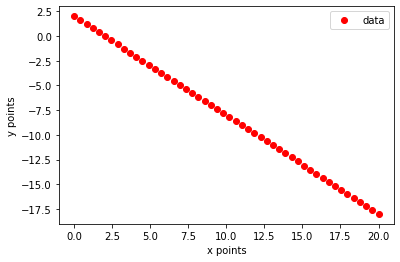

In [3]:
_ = plt.plot(x_points, y_points,'ro',label = 'data')
#_ = plt.scatter(x_points, y_points)
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
_ = plt.legend()

## plots function

In [4]:
def all_plots(x_points,y_hat, theta0_list , theta1_list , cost_function_list,it):
    _ = plt.plot(x_points,y_hat,label='model predictions')
    _ = plt.plot(x_points, y_points,'ro',label='real data')
    _ = plt.legend()
    _ = plt.xlabel('x points')
    _ = plt.ylabel('y points')
    plt.show()

    _ = plt.plot(theta1_list,cost_function_list,label ='loss function')
    _ = plt.title('cost function with theta 1')
    _ = plt.legend()
    _ = plt.xlabel('theta 1')
    _ = plt.ylabel('cost function')
    plt.show()

    _ = plt.plot(theta0_list,cost_function_list,label ='loss function')
    _ = plt.title('cost function with theta 0')
    _ = plt.legend()
    _ = plt.xlabel('theta 0')
    _ = plt.ylabel('cost function')
    plt.show()

    _ = plt.plot(cost_function_list)
    _ = plt.xlabel('iterations')
    _ = plt.ylabel('cost function')
    plt.show()

## evaluate the model function

In [5]:
def evaluate_the_model(y_hat, y_points, it):
    print(f'number of iterations is {it} ')
    r2 = r2_score(y_points,y_hat)
    print(f'r2 score is {r2}')

# momentum batch gradient descent
## single variable full batch

In [6]:
def momentum_batch_gradient(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0,gamma = 0.5,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    m0=0
    m1=0
    
    for i in range(iterations):

        #.........................define y_prediction ,error vectors and ..........................
        y_hat = theta1*x_points + theta0 #vector
        error = y_hat - y_points # vector

        #.......................cost_function(loss)..............................
        cost_function = (error.T.dot(error))/(2*m) # J(theta0,theta1)
        
        #.......................appending thetas and cost function..................
        cost_function_list.append(cost_function[0,0])#cuz dot product returns a 2d array
        theta0_list.append(theta0)
        theta1_list.append(theta1) #appending thetas before updating'em 

        #........................gradient ......................................
        gradient_theta0 = sum(error*1)/m  # this returns a one d array contains one number
        #gradient_theta1 = sum(error*x_points)/m
        gradient_theta1 = error.T.dot(x_points)/m #this returns an array 2d
        
        #..........................calculate momentum term.........................
        m0 = gamma * m0 + gradient_theta0[0] * learning_rate
        m1 = gamma * m1 + gradient_theta1[0,0] * learning_rate

        #...........................update thetas................................
        theta0 = theta0 - m0
        theta1 = theta1 - m1
        
        #.........................early stop condition.........................
        #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
        #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.001:
                break
        

    return y_hat, theta0_list , theta1_list , cost_function_list,i

number of iterations is 99 
r2 score is 0.9766376613121126


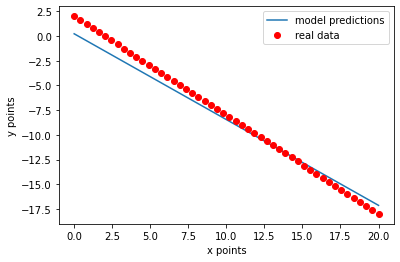

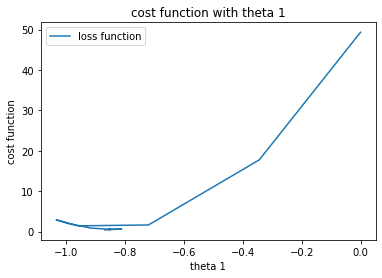

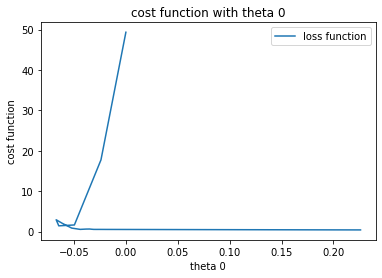

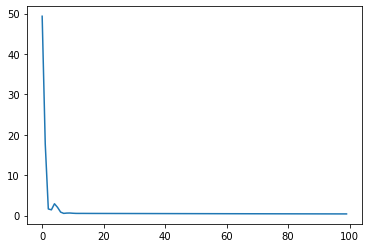

-0.8680502151822725

In [7]:
y_hat, theta0_list , theta1_list , cost_function_list,it = momentum_batch_gradient(x_points, y_points \
                                                                                   ,learning_rate = 0.003)
_ = plt.plot(x_points,y_hat,label='model predictions')
_ = plt.plot(x_points, y_points,'ro',label='real data')
_ = plt.legend()
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
print(f'number of iterations is {it} ')
r2 = r2_score(y_points,y_hat)
print(f'r2 score is {r2}')
plt.show()
_ = plt.plot(theta1_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 1')
_ = plt.legend()
_ = plt.xlabel('theta 1')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()

_ = plt.plot(theta0_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 0')
_ = plt.legend()
_ = plt.xlabel('theta 0')
_ = plt.ylabel('cost function')
plt.show()
_ = plt.plot(cost_function_list)
plt.show()
theta1_list[-1]

### draft cell // to be deleted

In [8]:
y_hat = 1*x_points + 2 #vector
error = y_hat - y_points # vector

#.......................cost_function(loss)..............................
cost_function = (error.T.dot(error))/(2*23) # J(theta0,theta1)
cost_function
np.array([1,2,3,4]).T.dot(np.array([1,2,3,4]))
x_points.shape
sum(error*1)[0]
error.shape
(sum(np.array([0,0,0]).reshape(-1,1))*1/1).shape


(1,)

# Nesterov Accelerated Gradient (NAG)
## single variable full batch

In [9]:
def Nag_gradient(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0,gamma = 0.5,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    m0=0
    m1=0
    
    for i in range(iterations):
        
        #...............................step 1: clculate theta temp...................................
        theta_temp0 = theta0 - gamma * m0
        theta_temp1 = theta1 - gamma * m1
        
        #...............................step 2: clculate y_hat , error vector and cost function...................................
        y_hat_temp = theta_temp1 * x_points + theta_temp0 #vector
        error = y_hat_temp - y_points #vector
        cost_function = (error.T.dot(error)) / (2*m) #J(theta0,theta1)
        
        #...............................step 3: clculate gradient of theta temp...................................
        gradient_theta_temp0 = sum(error*1) / m #vector
        gradient_theta_temp1 = (error.T.dot(x_points)) / m
        
        #...............................step 3.5: append thetas(before updating them) and cost function...................................
        theta0_list.append(theta0) 
        theta1_list.append(theta1) 
        cost_function_list.append(cost_function[0,0]) #cuz dot product produces 2d array
        
        #...............................step 4: clculate theta new...................................
        theta0 = theta_temp0 - learning_rate * gradient_theta_temp0[0] # u can use theta0 = theta0 - m0
        theta1 = theta_temp1 - learning_rate * gradient_theta_temp1[0,0] # this a 2d array contains one list
        
        #...............................step 5: calculate momentum vector..................................
        m0 = gamma * m0 + learning_rate * gradient_theta_temp0[0]
        m1 = gamma * m1 + learning_rate * gradient_theta_temp1[0,0] #cuz dot product produces 2d array

        #.........................early stop condition.........................
        #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
        #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.010:
                break
            if gradient_theta_temp0 < 0.1 and gradient_theta_temp1 < 0.1:
                break
    y_hat = theta0 + theta1 * x_points
    return y_hat, theta0_list , theta1_list , cost_function_list,i

number of iterations is 3 
r2 score is 0.9637621137468362


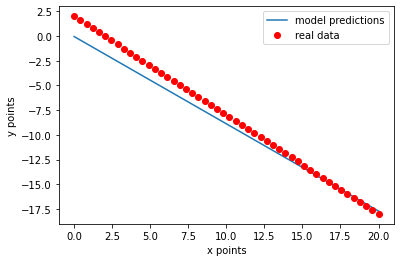

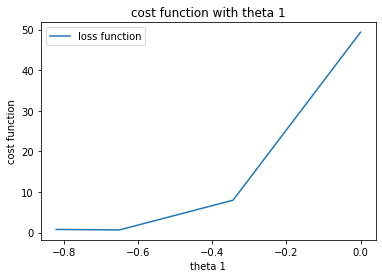

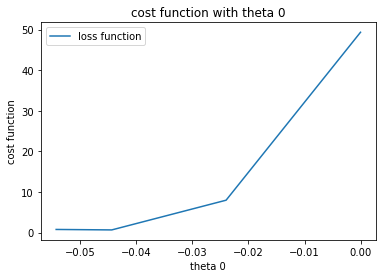

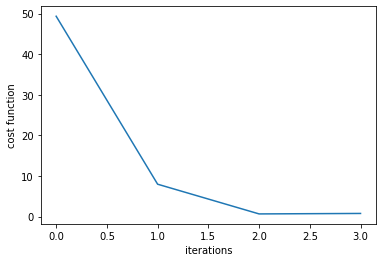

In [10]:
y_hat, theta0_list , theta1_list , cost_function_list,it = Nag_gradient(x_points,y_points,learning_rate = 0.003,gamma = 0.5)
print(f'number of iterations is {it} ')
r2 = r2_score(y_points,y_hat)
print(f'r2 score is {r2}')

#.....................................performing some plots................................................
all_plots(x_points,y_hat, theta0_list , theta1_list , cost_function_list,it)
